## Data Load - Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import math


In [4]:
import os
os.getcwd()

'C:\\Users\\ramanand'

In [105]:
logdata = pd.read_csv("https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv",
                           sep='\t')

In [107]:
logdata.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [92]:
logdata.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [115]:
logdata.describe(include=['O']) ## t check it's Cap O

,Name,Sex,Ticket,Cabin,Embarked
count,156,156,156,31,155
unique,156,2,145,28,3
top,"Johansson, Mr. Gustaf Joel",male,2651,C123,S
freq,1,100,2,2,110


In [93]:
logdata.shape ## dimention of dataset

(156, 12)

In [7]:
print(len(logdata.index))

156


In [8]:
print("# of total passangers in the dataset:" + str(len(logdata.index)))

# of total passangers in the dataset:156


## EDA (Exploratory Data Analysis)

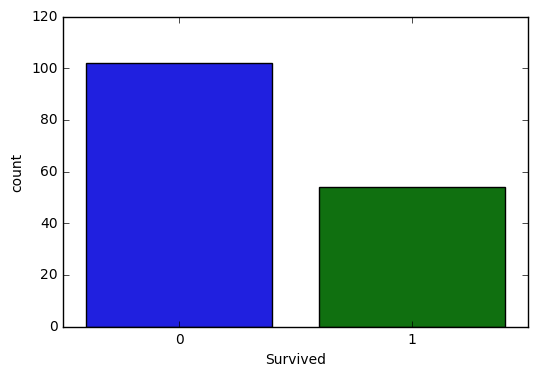

In [9]:
sns.countplot(x="Survived", data = logdata)

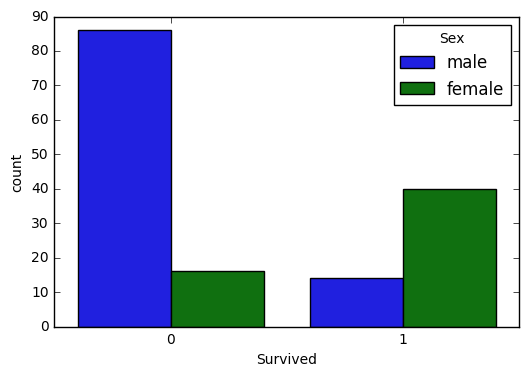

In [10]:
sns.countplot(x="Survived",  hue = "Sex",data = logdata)

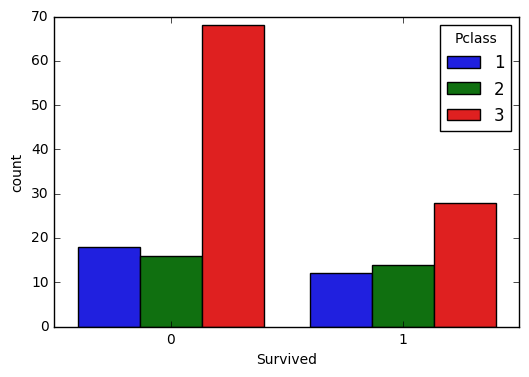

In [11]:
sns.countplot(x="Survived", hue="Pclass", data=logdata)

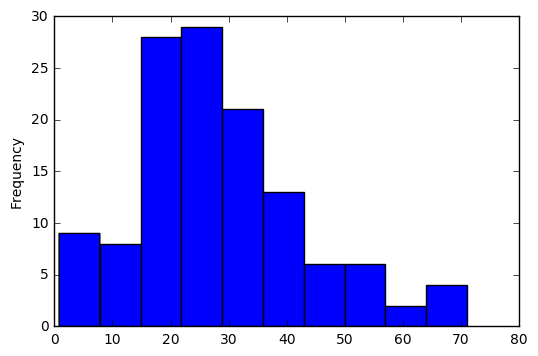

In [12]:
logdata["Age"].plot.hist()

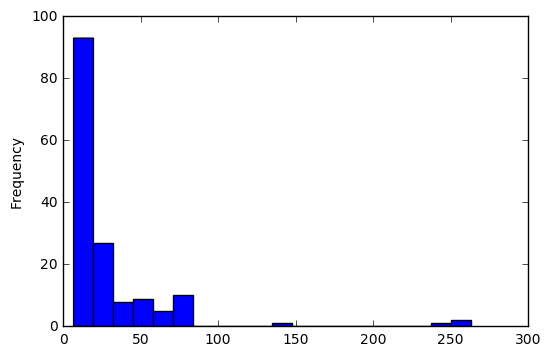

In [13]:
logdata["Fare"].plot.hist(bins=20)

In [14]:
logdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
PassengerId    156 non-null int64
Survived       156 non-null int64
Pclass         156 non-null int64
Name           156 non-null object
Sex            156 non-null object
Age            126 non-null float64
SibSp          156 non-null int64
Parch          156 non-null int64
Ticket         156 non-null object
Fare           156 non-null float64
Cabin          31 non-null object
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 14.7+ KB


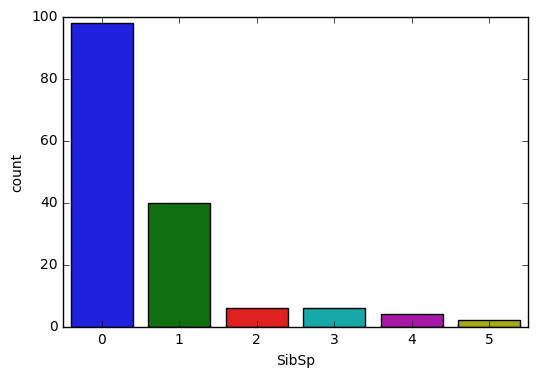

In [15]:
sns.countplot(x="SibSp", data=logdata)

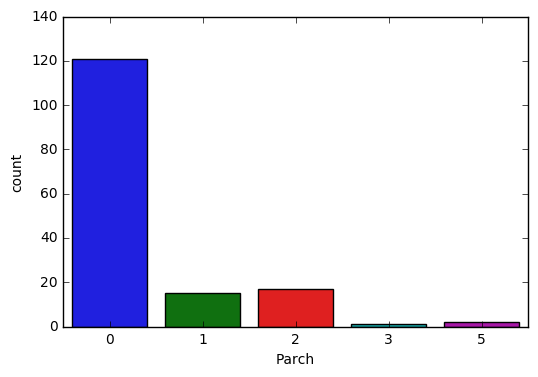

In [16]:
sns.countplot(x="Parch", data= logdata)

## Data cleaning/wrangling

In [86]:
logdata.isnull()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False


In [18]:
logdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

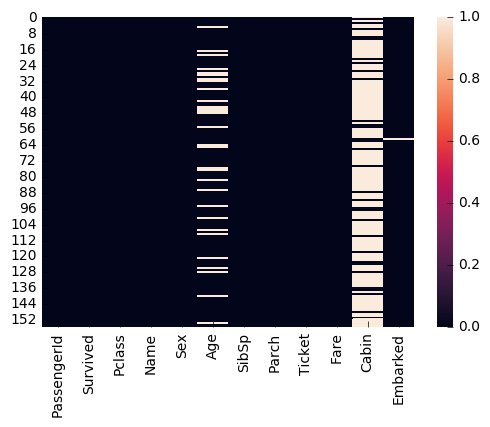

In [19]:
sns.heatmap(logdata.isnull())

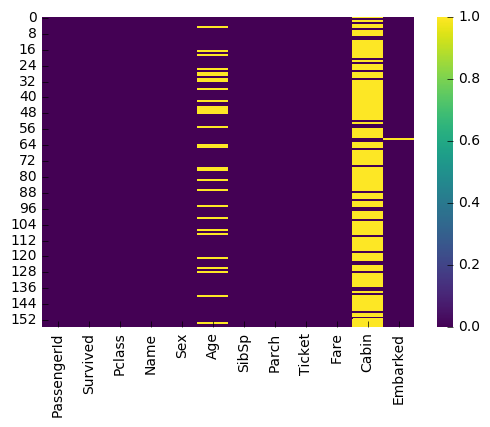

In [20]:
sns.heatmap(logdata.isnull(),cmap="viridis") # to ckeck

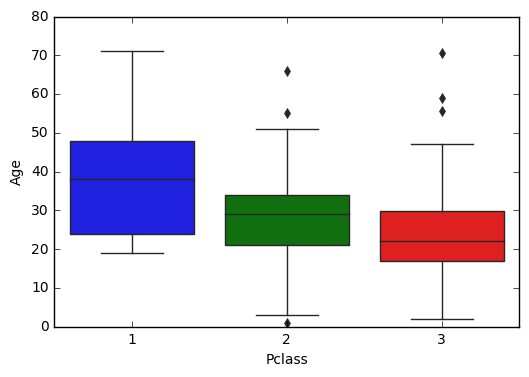

In [21]:
sns.boxplot(x="Pclass", y="Age", data=logdata)

In [22]:
logdata.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [24]:
logdata.drop("Cabin", axis=1, inplace=True) # to chk use of axis and implace

In [25]:
logdata.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [26]:
logdata.dropna(inplace=True)

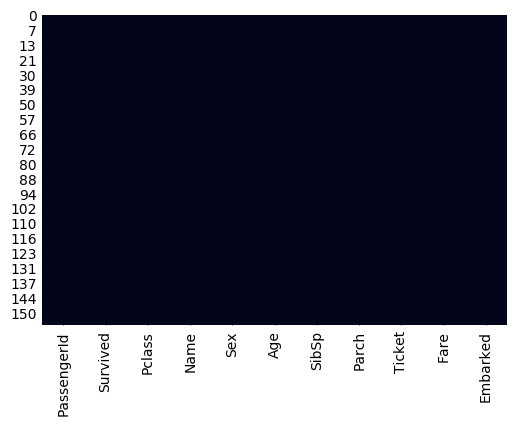

In [28]:
sns.heatmap(logdata.isnull(),cbar=False)

In [29]:
logdata.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [94]:
Sex = pd.get_dummies(logdata['Sex'],drop_first=True) # to check decimal values
Sex.head(3)

,male
0,1.0
1,0.0
2,0.0


In [36]:
embarked = pd.get_dummies(logdata["Embarked"],drop_first=True)
embarked.head(2)

,Q,S
0,0.0,1.0
1,0.0,0.0


In [95]:
Pclass = pd.get_dummies(logdata["Pclass"],prefix = 'Pclass', drop_first=True)
Pclass.head(2)

,Pclass_2,Pclass_3
0,0.0,1.0
1,0.0,0.0


In [96]:
## concatinate these modified columns

logdata = pd.concat([logdata,Sex,embarked,Pclass],axis=1)

In [97]:
logdata.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,0.0,1.0


In [42]:
## droping columns which are not require for fiting the moder

logdata.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True) ## 'Passengerid' not getting droped

In [43]:
logdata.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0


In [46]:
logdata.drop('Pclass',axis=1, inplace=True)

In [47]:
logdata.head(3)

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
2,3,1,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0


In [48]:
logdata.shape

(125, 11)

## Sampling Train, Test of data

In [59]:
X= logdata.drop("Survived",axis=1)
y= logdata["Survived"]

In [60]:
from sklearn.cross_validation import train_test_split  

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)


In [64]:
logmodel=LogisticRegression()

In [65]:
logmodel.fit(X_train,y_train,)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
from sklearn.metrics import classification_report

In [69]:
prediction = logmodel.predict(X_test)
prediction

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [71]:
classification_report(y_test,prediction)

'             precision    recall  f1-score   support\n\n          0       0.93      0.96      0.95        28\n          1       0.89      0.80      0.84        10\n\navg / total       0.92      0.92      0.92        38\n'

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y_test,prediction)

array([[27,  1],
       [ 2,  8]])

In [103]:
## ![Small confussion matrix](image/09_confusion_matrix_1.png)

'[Large' is not recognized as an internal or external command,
operable program or batch file.


In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test,prediction) ## Accuracy 92..%

0.92105263157894735

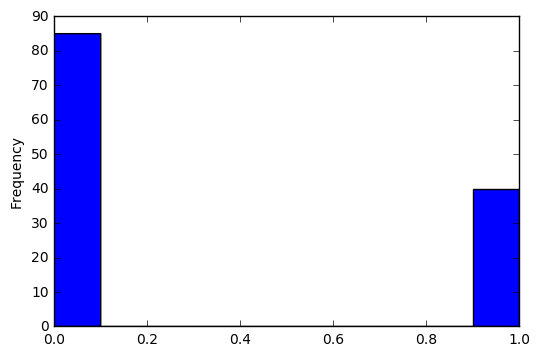

In [83]:
logdata["Survived"].plot.hist()

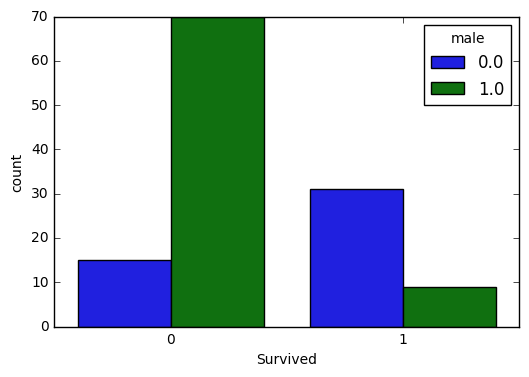

In [84]:
sns.countplot(x="Survived", hue="male", data=logdata)